## Histogram Equalization


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


%matplotlib inline

### Part a) Computing the histogram of an image.


##### Importing one of the images to develop our implementation.

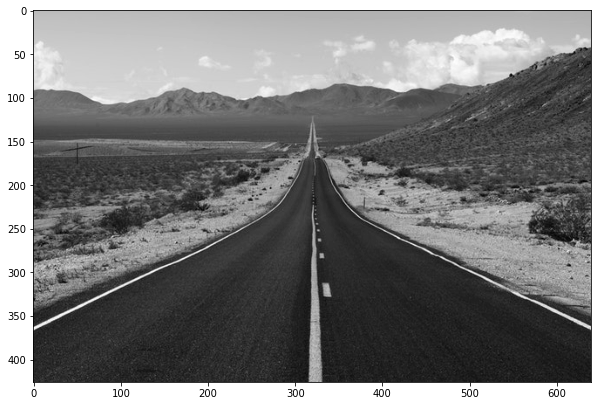

In [ ]:
image1 = cv2.imread('image1.jpg')
image1 = cv2.cvtColor(image1,cv2.COLOR_RGB2GRAY)
plt.figure(figsize = (10,8))
plt.imshow(image1, cmap = 'gray')

##### To have a histogram I made a flat array from the image and used plt.hist function of matplotlib to plot that histogram in 256 bins of our 8 bit image.

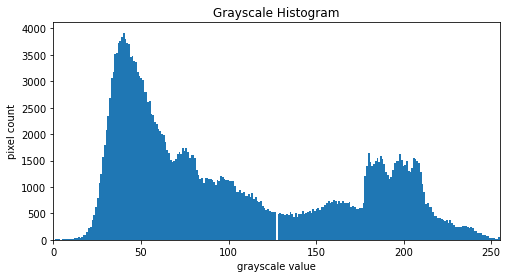

In [ ]:
flatImage1 = image1.flatten()
plt.figure(figsize = (8,4))
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0, 255])
plt.hist(flatImage1, bins=256)
plt.show()


> Histogram Equalization:
> Now I take our one-dimensional array and compute the histogram for the image based on the frequency of similar intensity values.
> The The mathematical formula from which we’ll base our solution is:
> ![Histogram Mathematical Formula](https://miro.medium.com/max/700/1*1vgTqBckFxcJ_njZujsgJw.png "Histogram Formula")
> Formula source: Medium.com

In [ ]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

# execute our histogram function
hist1 = get_histogram(flatImage1, 256)

> ##### Now we have our histogram, and we can take the next step towards equalization by computing the cumulative sum of the histogram. The cumulative sum is exactly as it sounds — the sum of all values in the histogram up to that point, taking into account all previous values. Just as above, there are functions that exist to compute this for you, but let’s write our own:

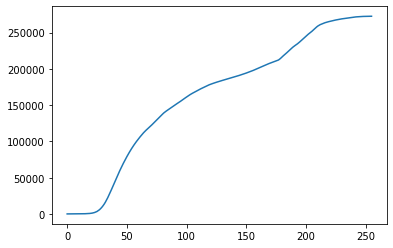

In [ ]:
# This function is copied from internet but I lost the link. (sorry!)

# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs1 = cumsum(hist1)

# display the result
plt.plot(cs1)

> ##### we have to normalize them to conform to a range of 0–255. Here’s one formula:
> ![Histogram Mathematical Formula](https://miro.medium.com/max/700/1*7rIAl9KHsWm02N0aXfqo_Q.png "Histogram Formula")


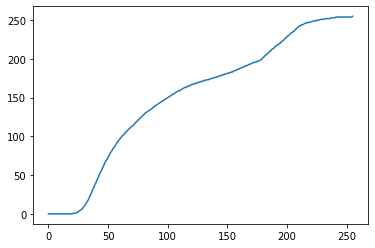

In [ ]:
# numerator & denomenator
nj1 = (cs1 - cs1.min()) * 255
N1 = cs1.max() - cs1.min()

# re-normalize the cumsum
cs1 = nj1 / N1

# cast it back to uint8 since we can't use floating point values in images
cs1 = cs1.astype('uint8')

plt.plot(cs1)

#### Then I used the implemented histogram equalization on the photo. (We need to reashape the output because I flattened it before process, to do that I used the original image shape.)

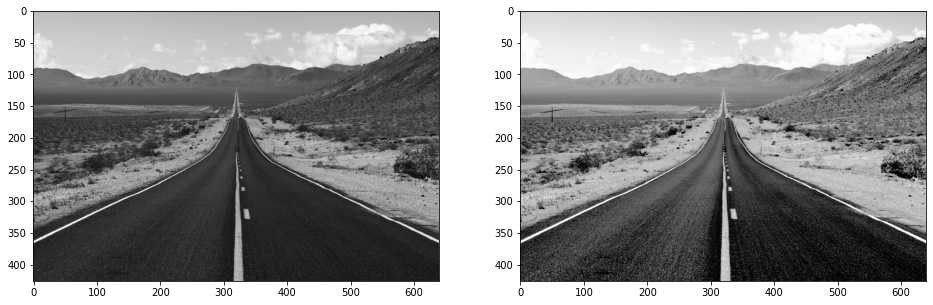

In [ ]:

# get the value from cumulative sum for every index in flat, and set that as img_new
img_new1 = cs1[flatImage1]

# put array back into original shape since we flattened it
img_new1 = np.reshape(img_new1, image1.shape)

# set up side-by-side image display
fig = plt.figure(figsize=(16,6))

fig.add_subplot(1,2,1)
plt.imshow(image1, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new1, cmap='gray')

plt.show(block=True)

#### Here is the histogram before and after equalization.

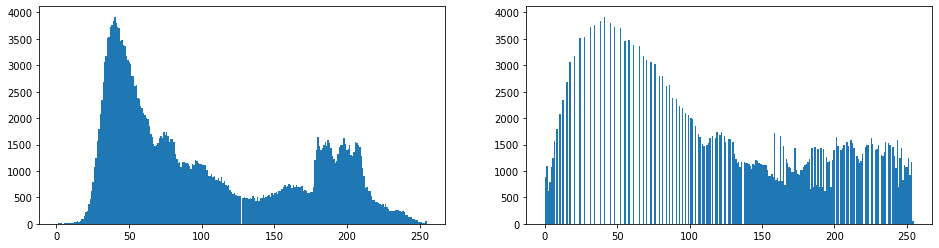

In [ ]:
img_new1 = cs1[flatImage1]
fig = plt.figure(figsize = (16,4))

fig.add_subplot(1,2,1)
plt.hist(flatImage1, bins=256)

# display the new image
fig.add_subplot(1,2,2)
plt.hist(img_new1, bins=256)

plt.show(block=True)

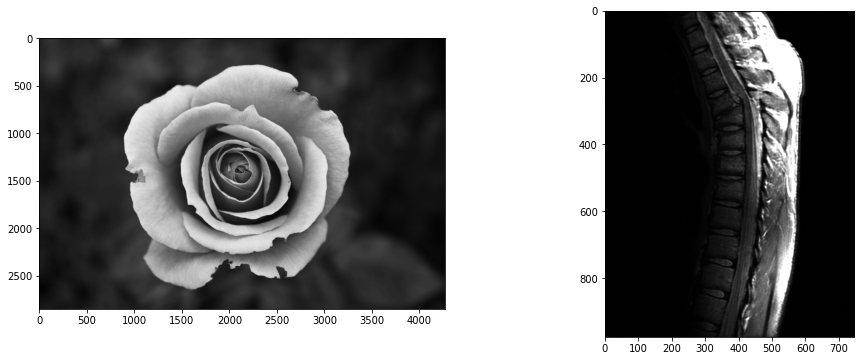

In [ ]:
image2 = cv2.imread('image2.jpg')
image2 = cv2.cvtColor(image2,cv2.COLOR_RGB2GRAY)
fig = plt.figure(figsize = (16,6))
fig.add_subplot(1,2,1)
plt.imshow(image2, cmap = 'gray')
image3 = cv2.imread('Fig0308(a)(fractured_spine).tif')
image3 = cv2.cvtColor(image3,cv2.COLOR_RGB2GRAY)
fig.add_subplot(1,2,2)
plt.imshow(image3, cmap = 'gray')

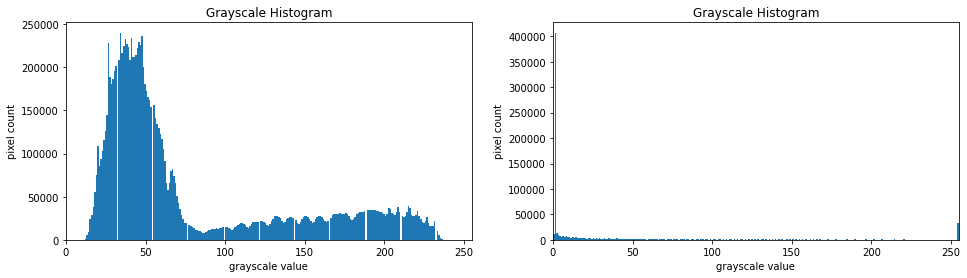

In [ ]:
flatImage2 = image2.flatten()
fig = plt.figure(figsize = (16, 4))
fig.add_subplot(1,2,1)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0, 255])
plt.hist(flatImage2, bins=256)


flatImage3 = image3.flatten()
fig.add_subplot(1,2,2)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0, 255])
plt.hist(flatImage3, bins=256)
plt.show()

In [ ]:
hist2 = get_histogram(flatImage2, 256)
hist3 = get_histogram(flatImage3, 256)

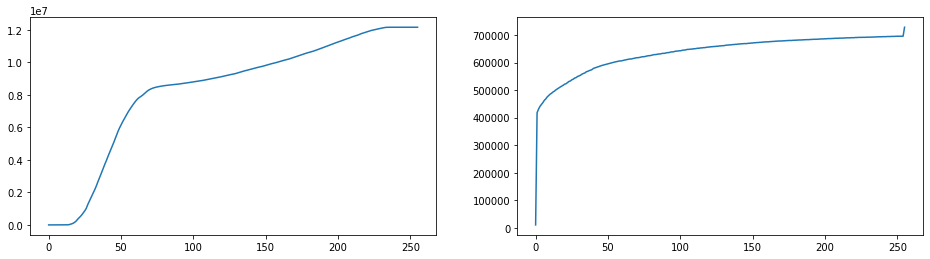

In [ ]:
fig = plt.figure(figsize = (16, 4))

cs2 = cumsum(hist2)
fig.add_subplot(1,2,1)
# display the result
plt.plot(cs2)

cs3 = cumsum(hist3)
fig.add_subplot(1,2,2)
# display the result
plt.plot(cs3)

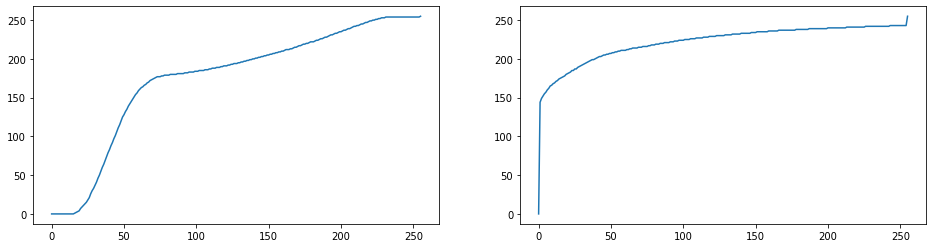

In [ ]:
fig = plt.figure(figsize = (16, 4))

# numerator & denomenator
nj2 = (cs2 - cs2.min()) * 255
N2 = cs2.max() - cs2.min()

# re-normalize the cumsum
cs2 = nj2 / N2

# cast it back to uint8 since we can't use floating point values in images
cs2 = cs2.astype('uint8')
fig.add_subplot(1,2,1)
plt.plot(cs2)


# numerator & denomenator
nj3 = (cs3 - cs3.min()) * 255
N3 = cs3.max() - cs3.min()

# re-normalize the cumsum
cs3 = nj3 / N3

# cast it back to uint8 since we can't use floating point values in images
cs3 = cs3.astype('uint8')
fig.add_subplot(1,2,2)
plt.plot(cs3)

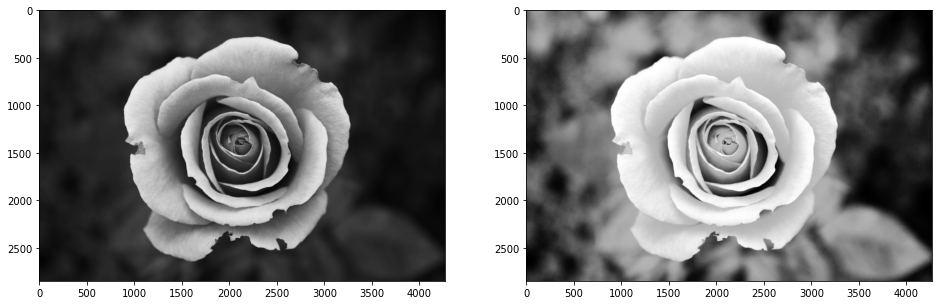

In [ ]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new2 = cs2[flatImage2]

# put array back into original shape since we flattened it
img_new2 = np.reshape(img_new2, image2.shape)

# set up side-by-side image display
fig = plt.figure(figsize=(16,6))


fig.add_subplot(1,2,1)
plt.imshow(image2, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new2, cmap='gray')

plt.show(block=True)

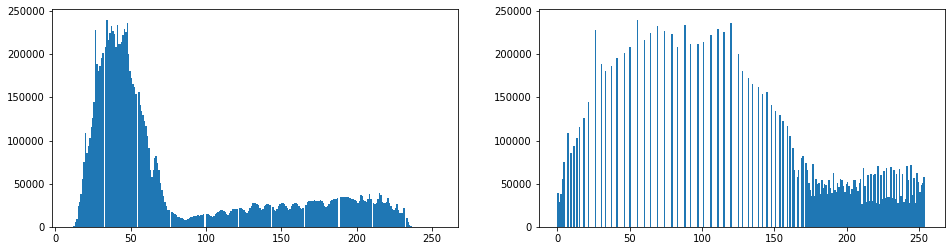

In [ ]:
img_new2 = cs2[flatImage2]
fig = plt.figure(figsize = (16,4))

fig.add_subplot(1,2,1)
plt.hist(flatImage2, bins=256)

# display the new image
fig.add_subplot(1,2,2)
plt.hist(img_new2, bins=256)

plt.show(block=True)

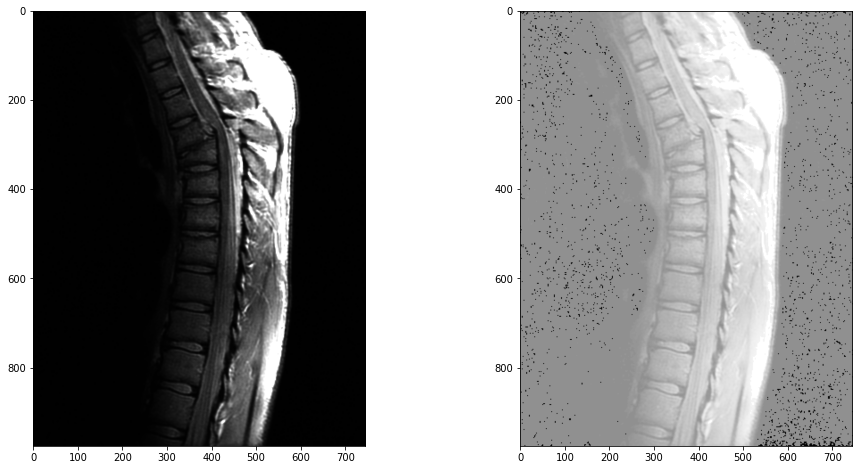

In [ ]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new3 = cs3[flatImage3]

# put array back into original shape since we flattened it
img_new3 = np.reshape(img_new3, image3.shape)

# set up side-by-side image display
fig = plt.figure(figsize=(16,8))

fig.add_subplot(1,2,1)
plt.imshow(image3, cmap='gray')

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new3, cmap='gray')

plt.show(block=True)

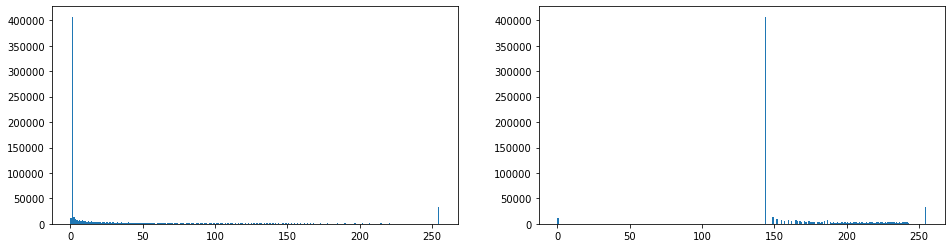

In [ ]:
img_new3 = cs3[flatImage3]
fig = plt.figure(figsize = (16,4))

fig.add_subplot(1,2,1)
plt.hist(flatImage3, bins=256)

# display the new image
fig.add_subplot(1,2,2)
plt.hist(img_new3, bins=256)

plt.show(block=True)

### In conclusion we see that there is a difference in contrast between original images and the histogram equalized results. The key difference for my two test images is more about contrast quality of images and for the image from the book shows that for an image like that with low intensity in the most pixels the process brighten up the image and pop some detailes out but there is some pepper noise in the dark area.